# Import libraries

In [59]:
import pandas as pd
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import utils
import config
import re
import os

In [60]:
# set figure details
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Metadata

In [61]:
metadata = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata.tsv"), sep="\t", index_col=0)
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,expo_cat1,expo_cat2,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,GBS antibiotics,C-section with labor,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388


In [62]:
metadata["timepoint"] = metadata["Timeline_Weeks"]

has_time_info = ~metadata["Timeline_Weeks"].isna() & (metadata["Timeline_Weeks"] != "na")
metadata = metadata.loc[has_time_info]
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,expo_cat2,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth,timepoint
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781,0
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038,1
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636,0
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017,0
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,Vaginal,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968,96
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,Vaginal,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880,96
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,C-section with labor,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388,96


In [63]:
bos_taurus_nohuman_clean = pd.read_csv(os.path.join(config.CLEAN_DIR, "bos_taurus_nohuman_readcount.tsv"), index_col=0)
bos_taurus_nohuman_clean

,1
magic.0001,0
magic.0004,0
magic.0006,2
magic.0007,0
magic.0008,0
...,...
magic.6595,26
magic.6597,1
magic.6598,0
magic.6599,0


In [64]:
human_clean = pd.read_csv(os.path.join(config.CLEAN_DIR, "human_clean.tsv"), index_col=0)
human_clean

,1
magic.0001,946
magic.0004,1024
magic.0006,479062
magic.0007,83512
magic.0008,19168
...,...
magic.6595,726
magic.6597,485
magic.6598,403
magic.6599,1143


In [65]:
metadata["bos_taurus_nohuman_clean"] = bos_taurus_nohuman_clean
metadata["Bos taurus relative abundance"] = metadata["bos_taurus_nohuman_clean"] / metadata["depth"]
metadata["Bos taurus relative abundance (log trans)"] = np.log10(metadata["Bos taurus relative abundance"] + 0.00001)
metadata

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_16170/4070365035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["bos_taurus_nohuman_clean"] = bos_taurus_nohuman_clean
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_16170/4070365035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["Bos taurus relative abundance"] = metadata["bos_taurus_nohuman_clean"] / metadata["depth"]
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_16170/4070365035.py:3: SettingWi

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth,timepoint,bos_taurus_nohuman_clean,Bos taurus relative abundance,Bos taurus relative abundance (log trans)
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781,0,0,0.000000e+00,-5.000000
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038,1,0,0.000000e+00,-5.000000
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636,0,2,1.162361e-06,-4.952244
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017,0,0,0.000000e+00,-5.000000
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044,0,0,0.000000e+00,-5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968,96,26,1.663502e-05,-4.574547
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880,96,1,4.730638e-07,-4.979926
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388,96,0,0.000000e+00,-5.000000


In [66]:
metadata["human_clean"] = human_clean
metadata["Human relative abundance"] = metadata["human_clean"] / metadata["depth"]
metadata["Human relative abundance (log trans)"] = np.log10(metadata["Human relative abundance"] + 0.00001)
metadata

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_16170/3036966805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["human_clean"] = human_clean
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_16170/3036966805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["Human relative abundance"] = metadata["human_clean"] / metadata["depth"]
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_16170/3036966805.py:3: SettingWithCopyWarning: 
A value is trying to be set 

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,Filename,Extraction,depth,timepoint,bos_taurus_nohuman_clean,Bos taurus relative abundance,Bos taurus relative abundance (log trans),human_clean,Human relative abundance,Human relative abundance (log trans)
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,magic.0001.S22.001.fa,MagAttract,1544781,0,0,0.000000e+00,-5.000000,946,0.000612,-3.205941
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,magic.0004.S34.001.fa,MagAttract,1167038,1,0,0.000000e+00,-5.000000,1024,0.000877,-3.051863
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,magic.0006.S145.001.fa,PowerSoil,1720636,0,2,1.162361e-06,-4.952244,479062,0.278421,-0.555282
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,magic.0007.S155.001.fa,PowerSoil,6825017,0,0,0.000000e+00,-5.000000,83512,0.012236,-1.912000
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,X8.S125.001.fa,PowerSoil,2928044,0,0,0.000000e+00,-5.000000,19168,0.006546,-2.183338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,magic.6595.S253.001.fa,PowerSoilPro,1562968,96,26,1.663502e-05,-4.574547,726,0.000465,-3.323763
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,magic.6597.S265.001.fa,PowerSoilPro,2113880,96,1,4.730638e-07,-4.979926,485,0.000229,-3.620811
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,magic.6598.S277.001.fa,PowerSoilPro,1650388,96,0,0.000000e+00,-5.000000,403,0.000244,-3.594850


In [67]:
metadata.index = metadata["Patient_No"]
metadata["timepoint_plot"] = [int(time) for time in metadata["timepoint"]]
# metadata["timepoint_plot"] = metadata["timepoint_plot"].apply(lambda x : {0 : 0, 1 : 1, 2 : 2, 3 : 3, 4 : 4, 
#     12: 5, 24 : 6, 36 : 7, 48 : 8, 60 : 9, 72 : 10, 84 : 11, 96 : 12}[x])
metadata

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_16170/1879103518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["timepoint_plot"] = [int(time) for time in metadata["timepoint"]]


,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,Extraction,depth,timepoint,bos_taurus_nohuman_clean,Bos taurus relative abundance,Bos taurus relative abundance (log trans),human_clean,Human relative abundance,Human relative abundance (log trans),timepoint_plot
Patient_No,,,,,,,,,,,,,,,,,,,,,
101,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,MagAttract,1544781,0,0,0.000000e+00,-5.000000,946,0.000612,-3.205941,0
101,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,MagAttract,1167038,1,0,0.000000e+00,-5.000000,1024,0.000877,-3.051863,1
104,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,PowerSoil,1720636,0,2,1.162361e-06,-4.952244,479062,0.278421,-0.555282,0
105,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,PowerSoil,6825017,0,0,0.000000e+00,-5.000000,83512,0.012236,-1.912000,0
105,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,PowerSoil,2928044,0,0,0.000000e+00,-5.000000,19168,0.006546,-2.183338,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,PowerSoilPro,1562968,96,26,1.663502e-05,-4.574547,726,0.000465,-3.323763,96
595,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,PowerSoilPro,2113880,96,1,4.730638e-07,-4.979926,485,0.000229,-3.620811,96
585,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,PowerSoilPro,1650388,96,0,0.000000e+00,-5.000000,403,0.000244,-3.594850,96


In [68]:
timepoints_sorted = np.unique(metadata["Timeline_Weeks"])
timepoints_sorted = sorted(timepoints_sorted, key=lambda x : int(x))

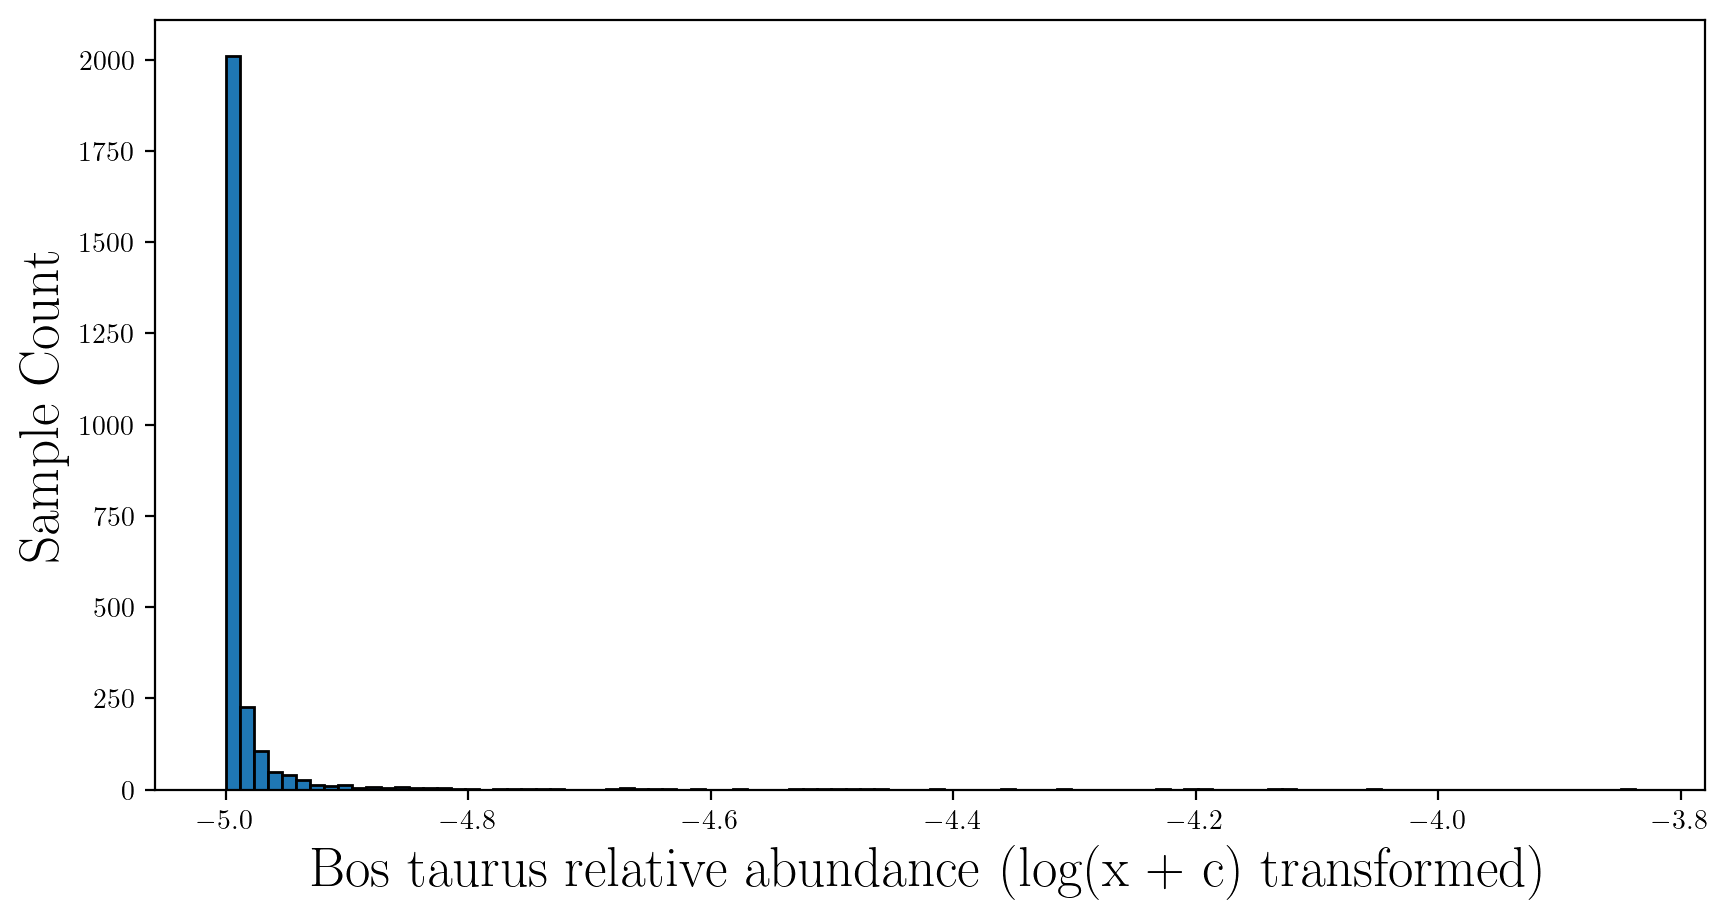

In [69]:
plt.figure(figsize=(10, 5), dpi=200, facecolor="white")

alpha = 1
metadata["Bos taurus relative abundance (log trans)"].plot.hist(bins=100, alpha=alpha, edgecolor="black")

plt.ylabel("Sample Count", fontsize=20)
plt.xlabel("Bos taurus relative abundance (log(x + c) transformed)", fontsize=20)

plt.show()

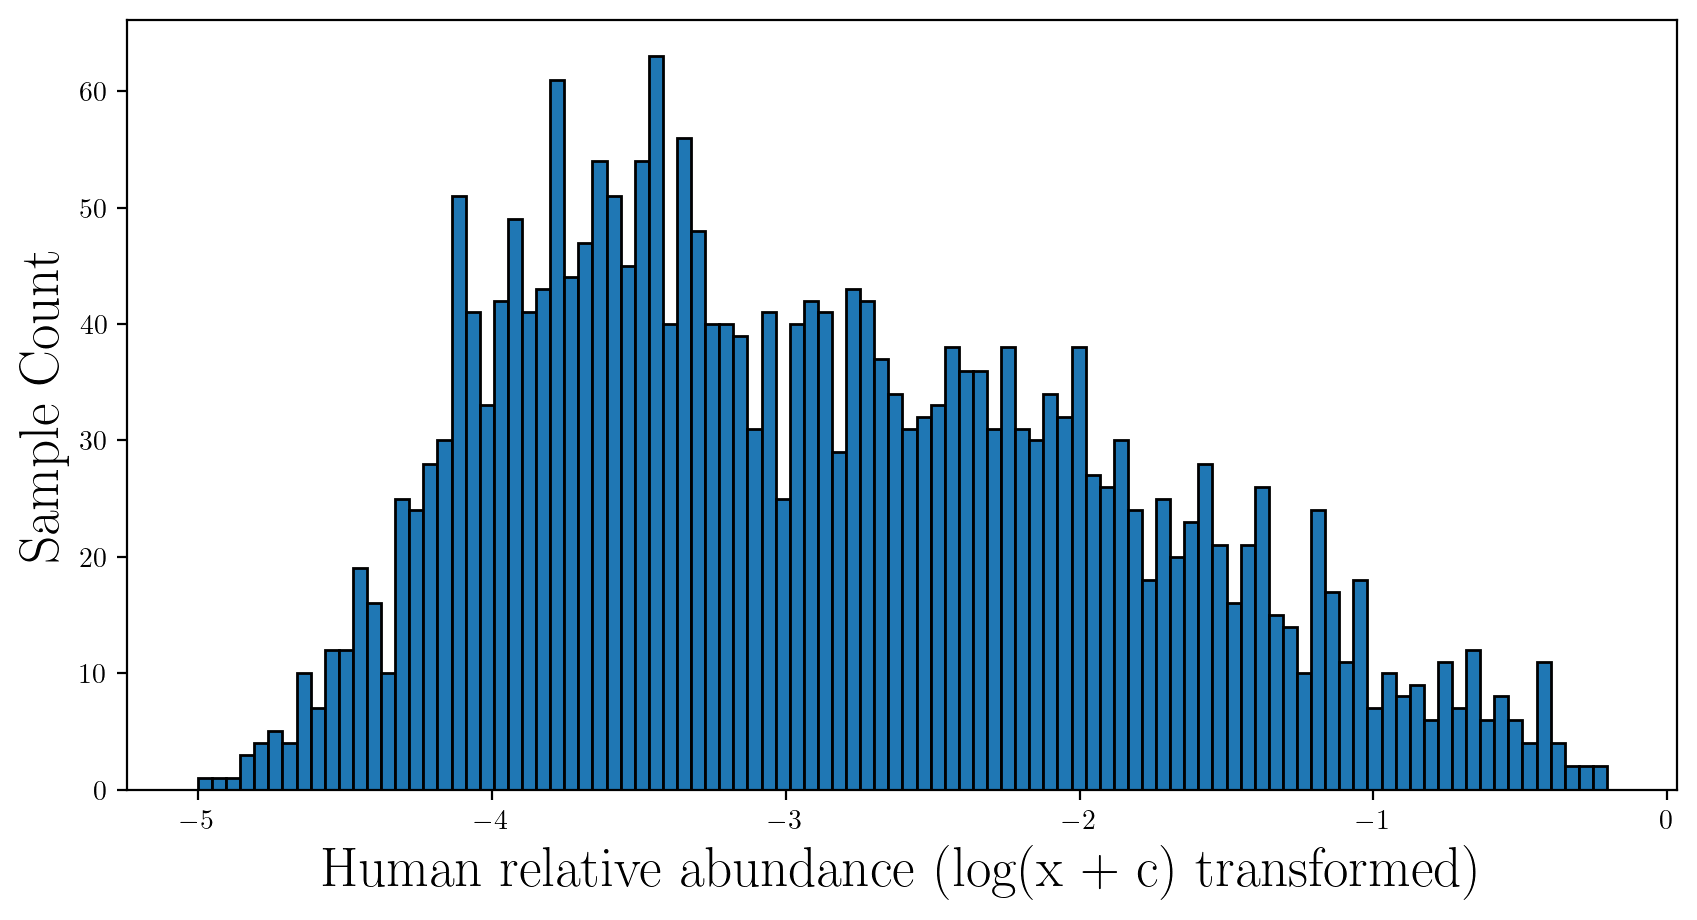

In [70]:
plt.figure(figsize=(10, 5), dpi=200, facecolor="white")

alpha = 1
metadata["Human relative abundance (log trans)"].plot.hist(bins=100, alpha=alpha, edgecolor="black")

plt.ylabel("Sample Count", fontsize=20)
plt.xlabel("Human relative abundance (log(x + c) transformed)", fontsize=20)

plt.show()

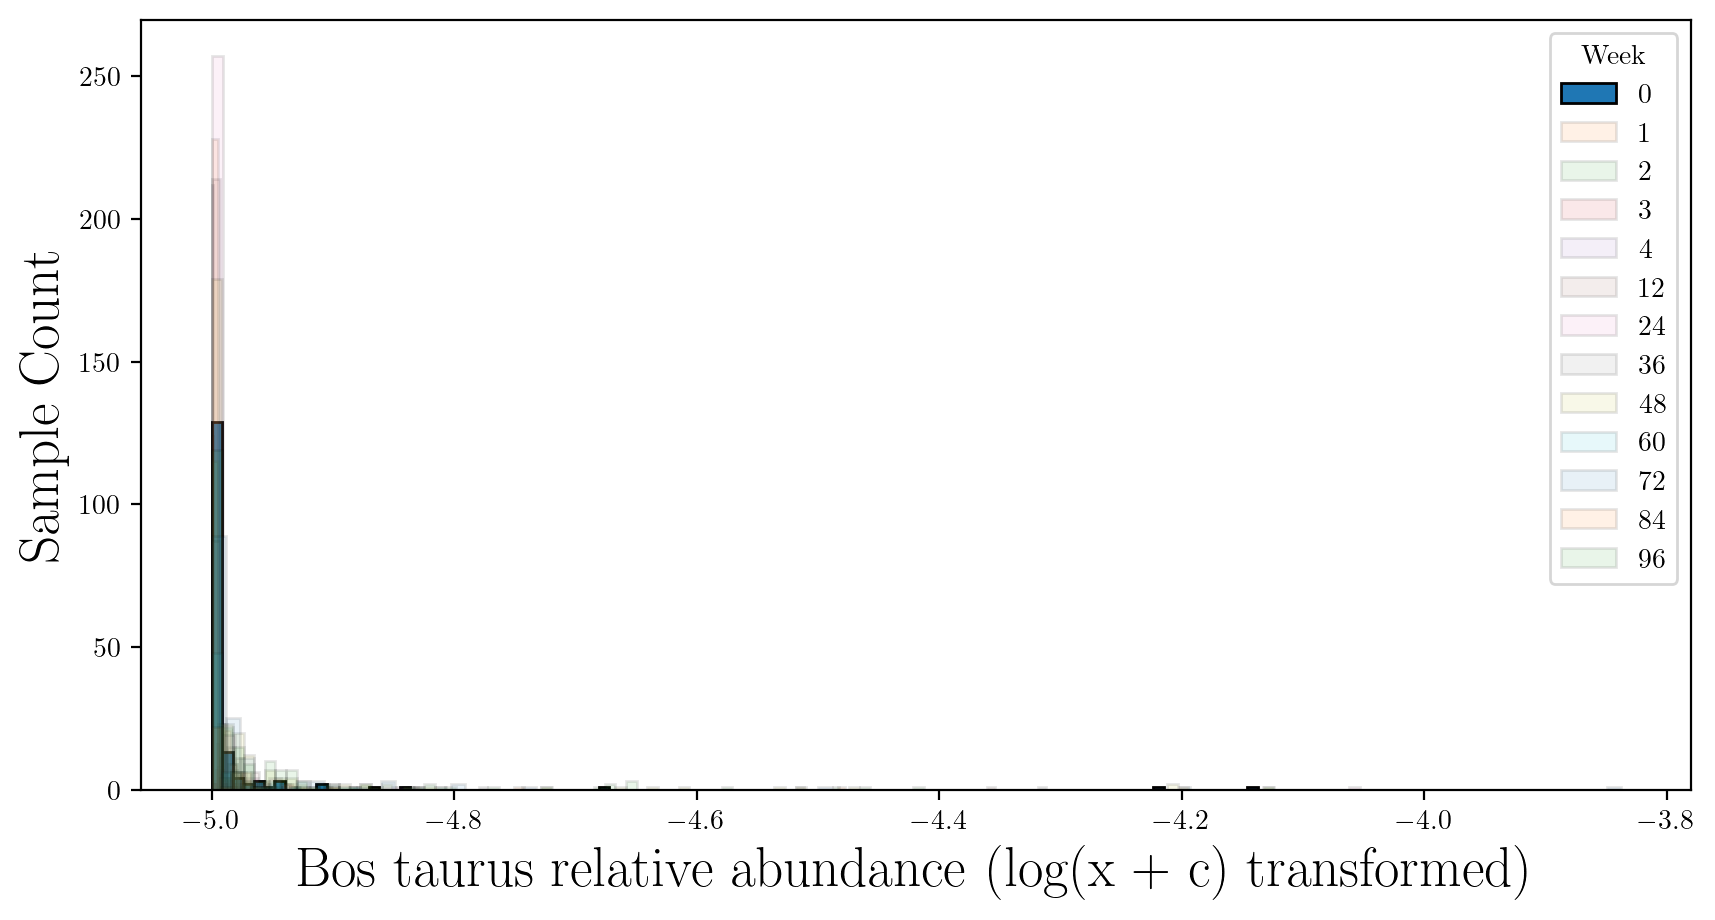

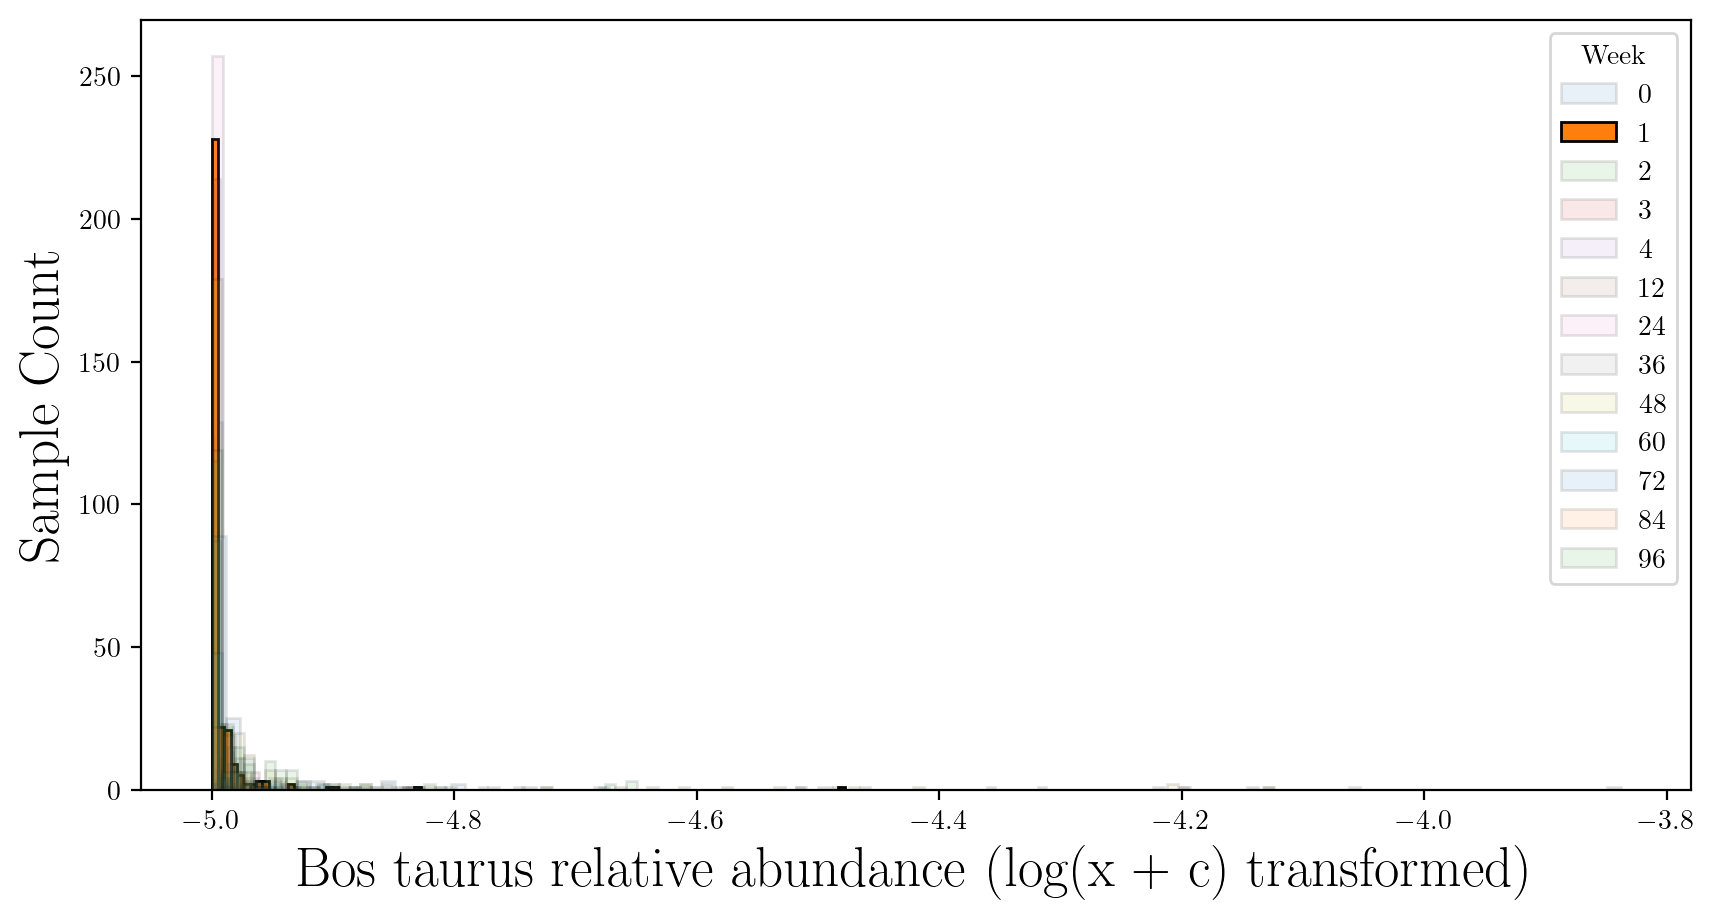

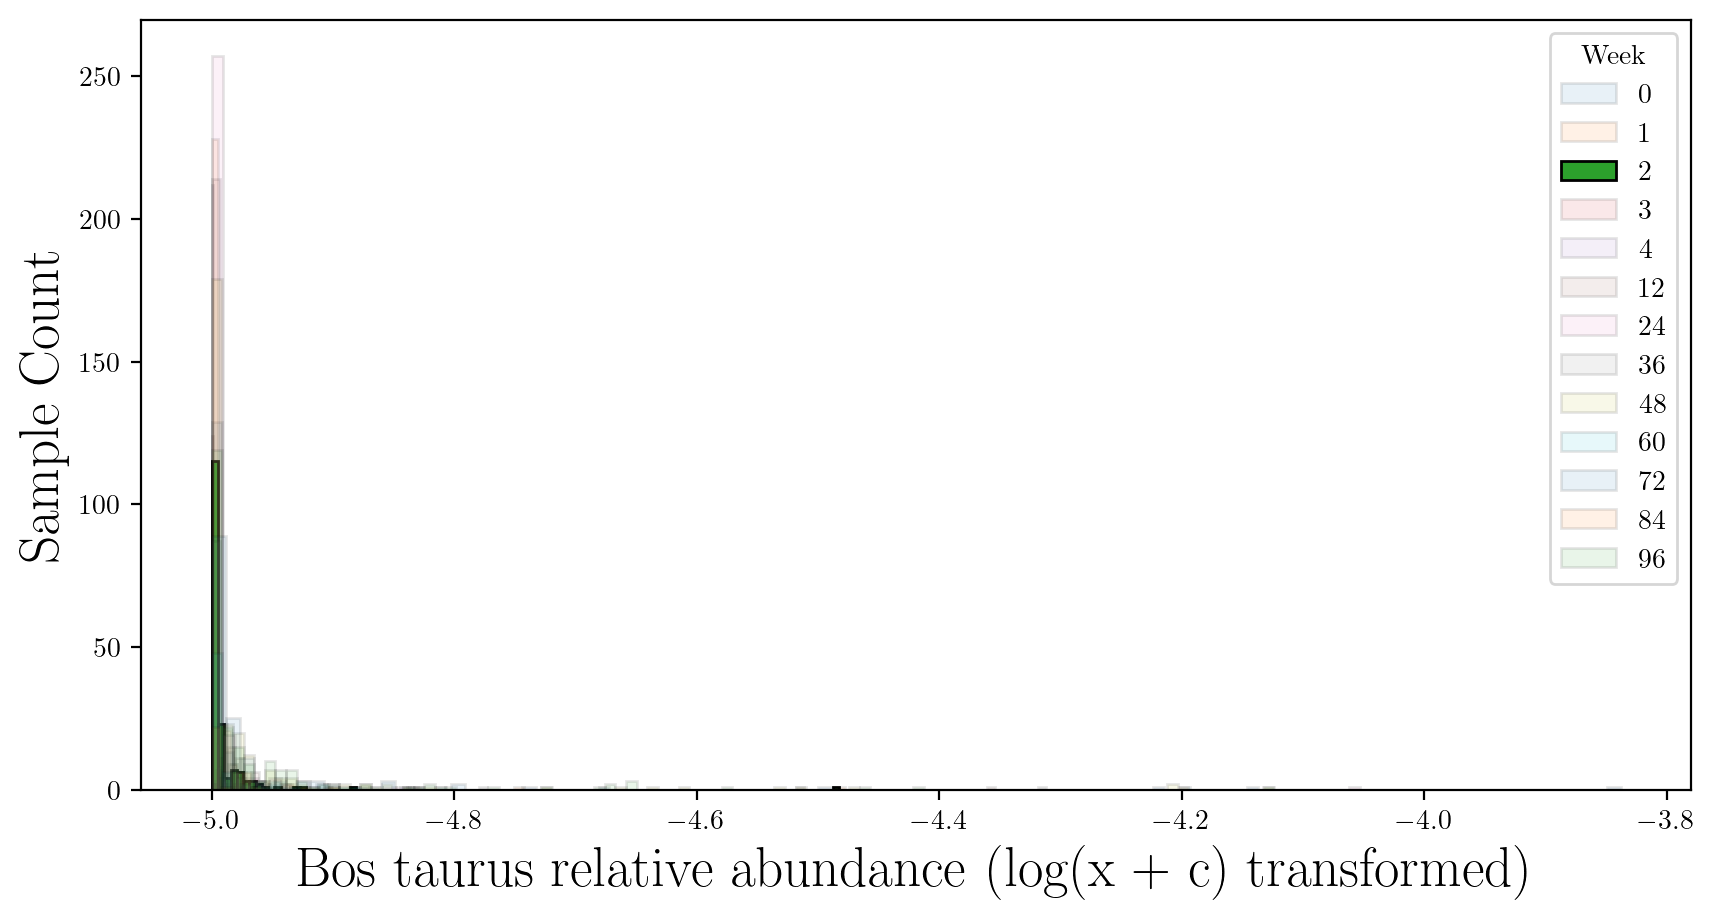

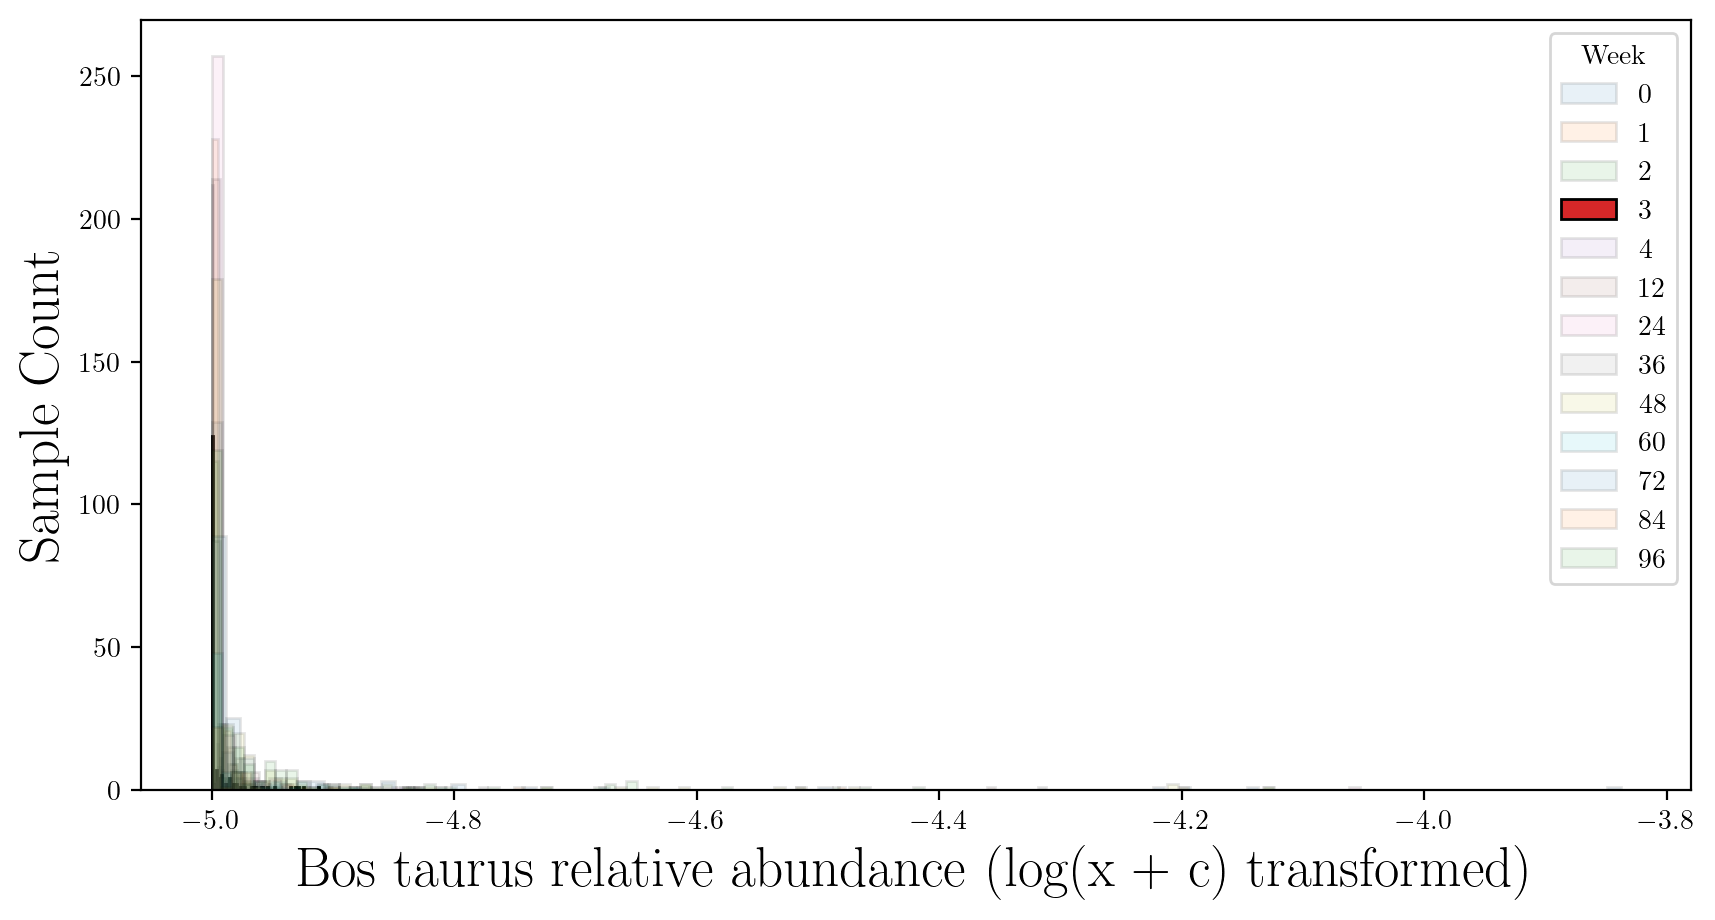

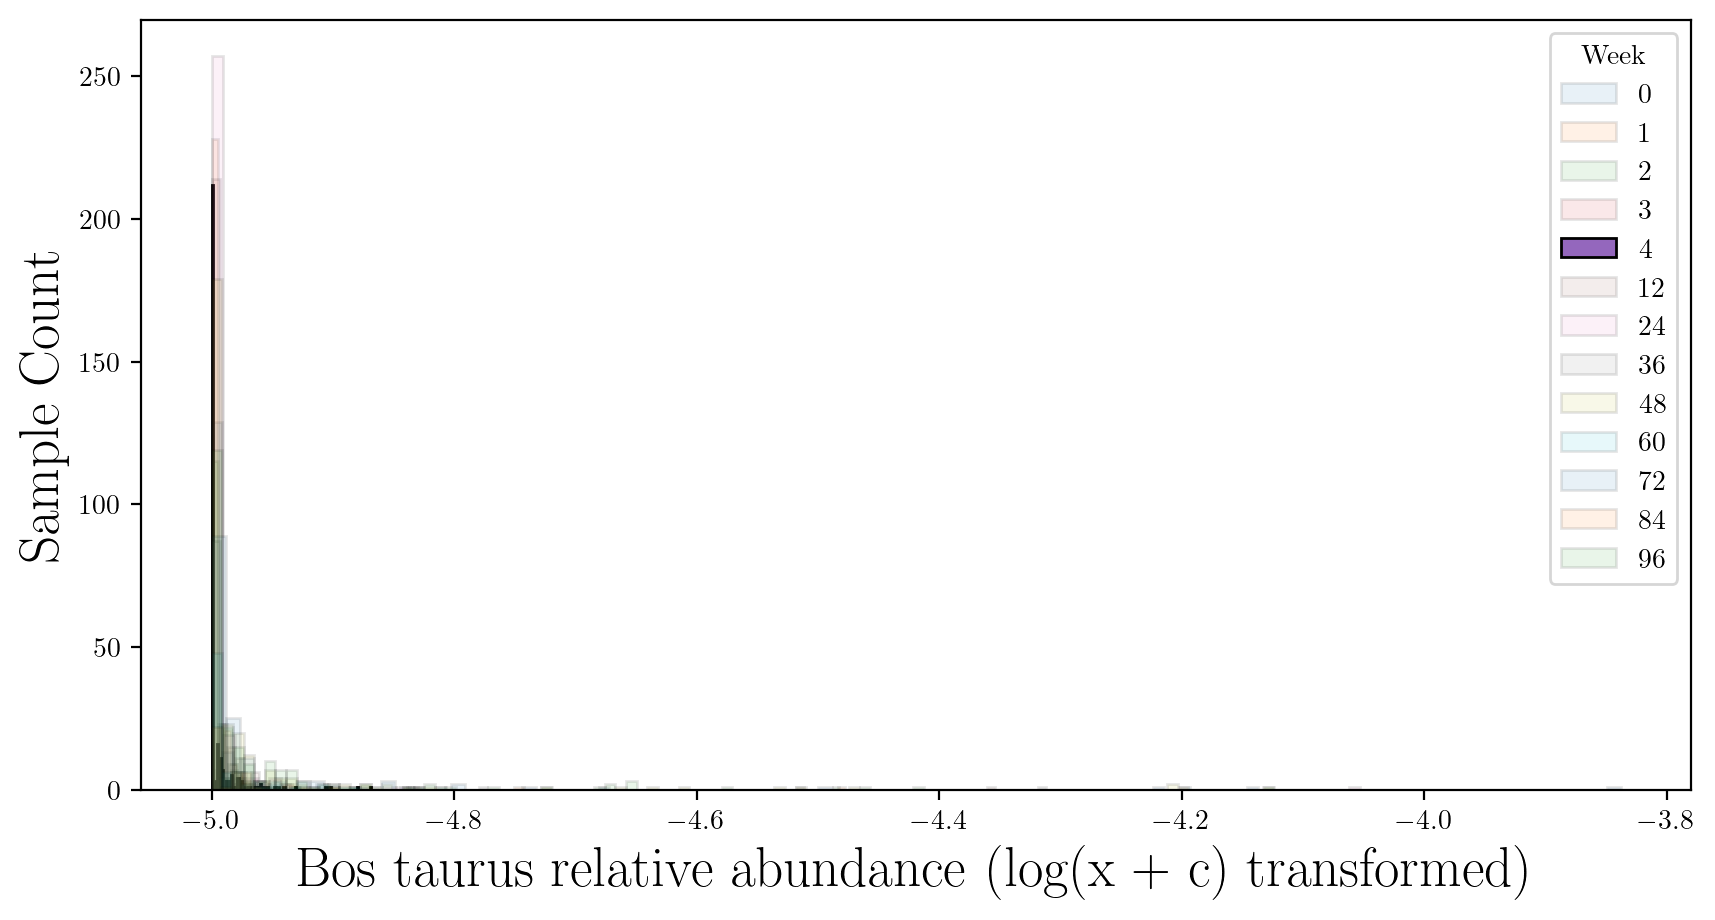

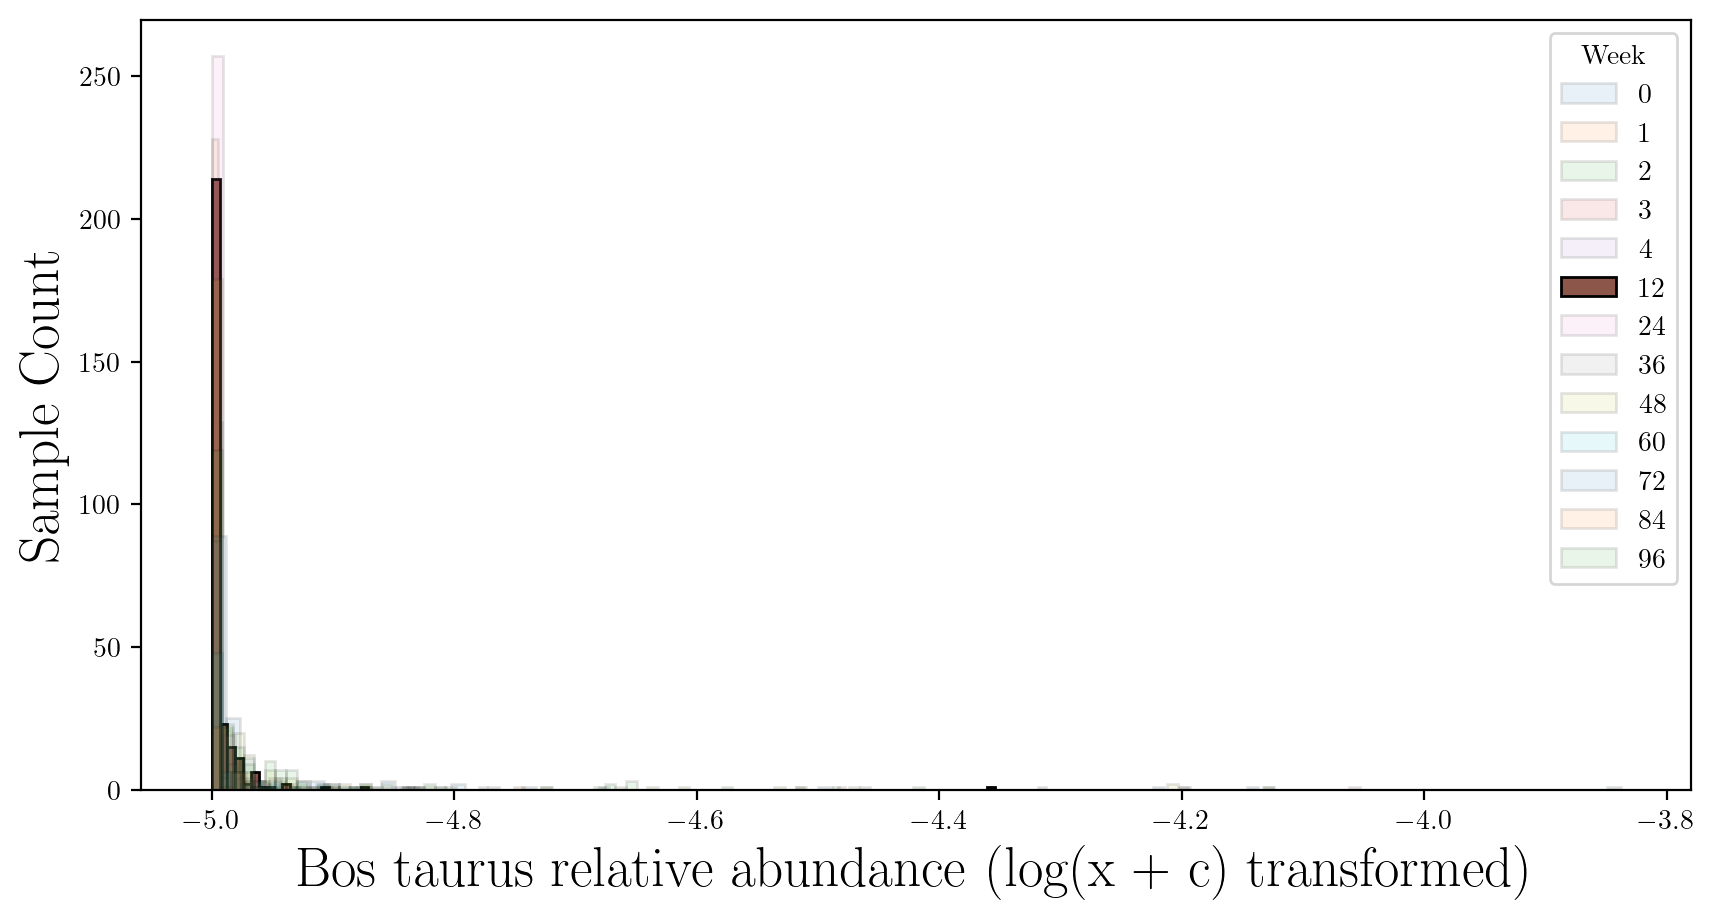

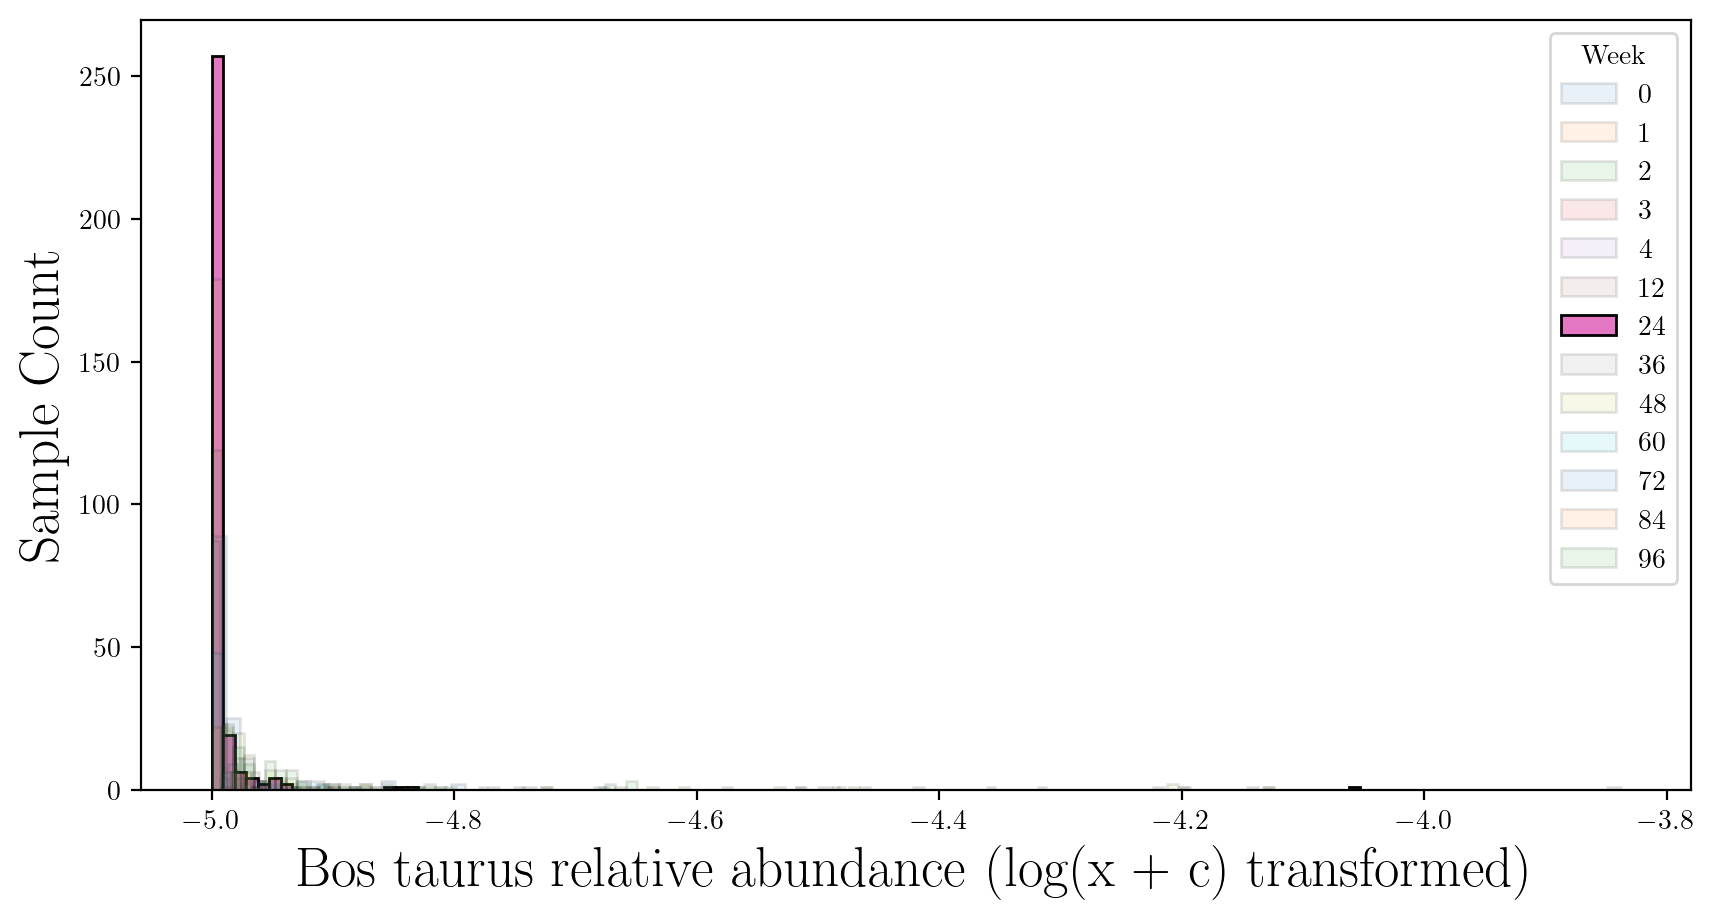

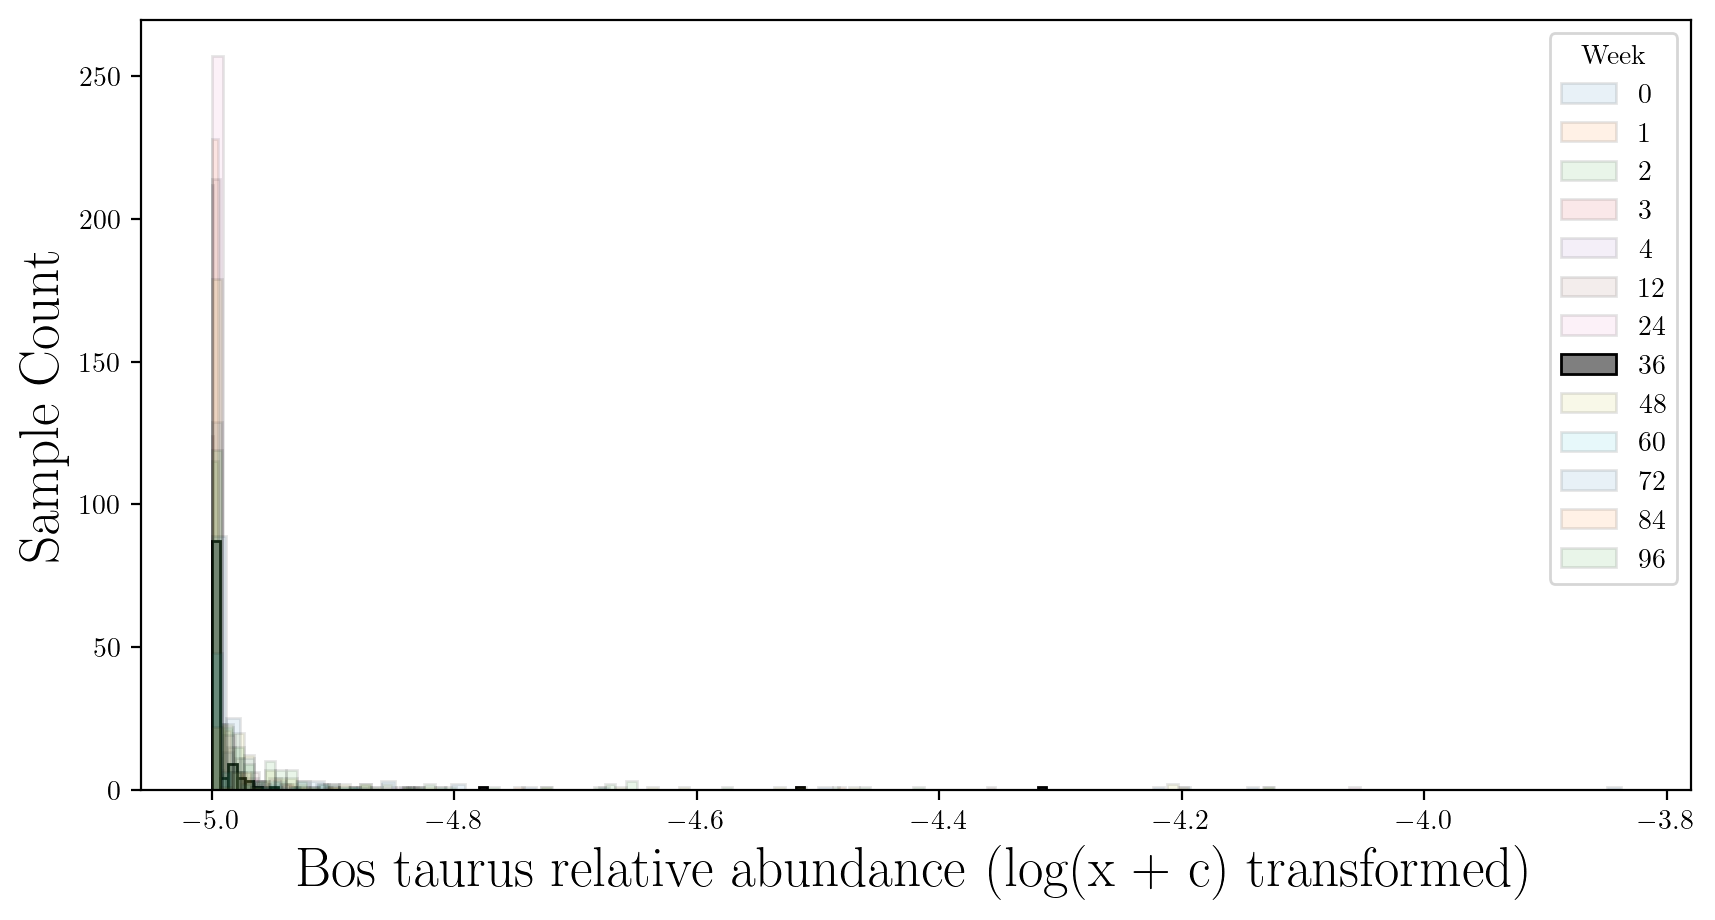

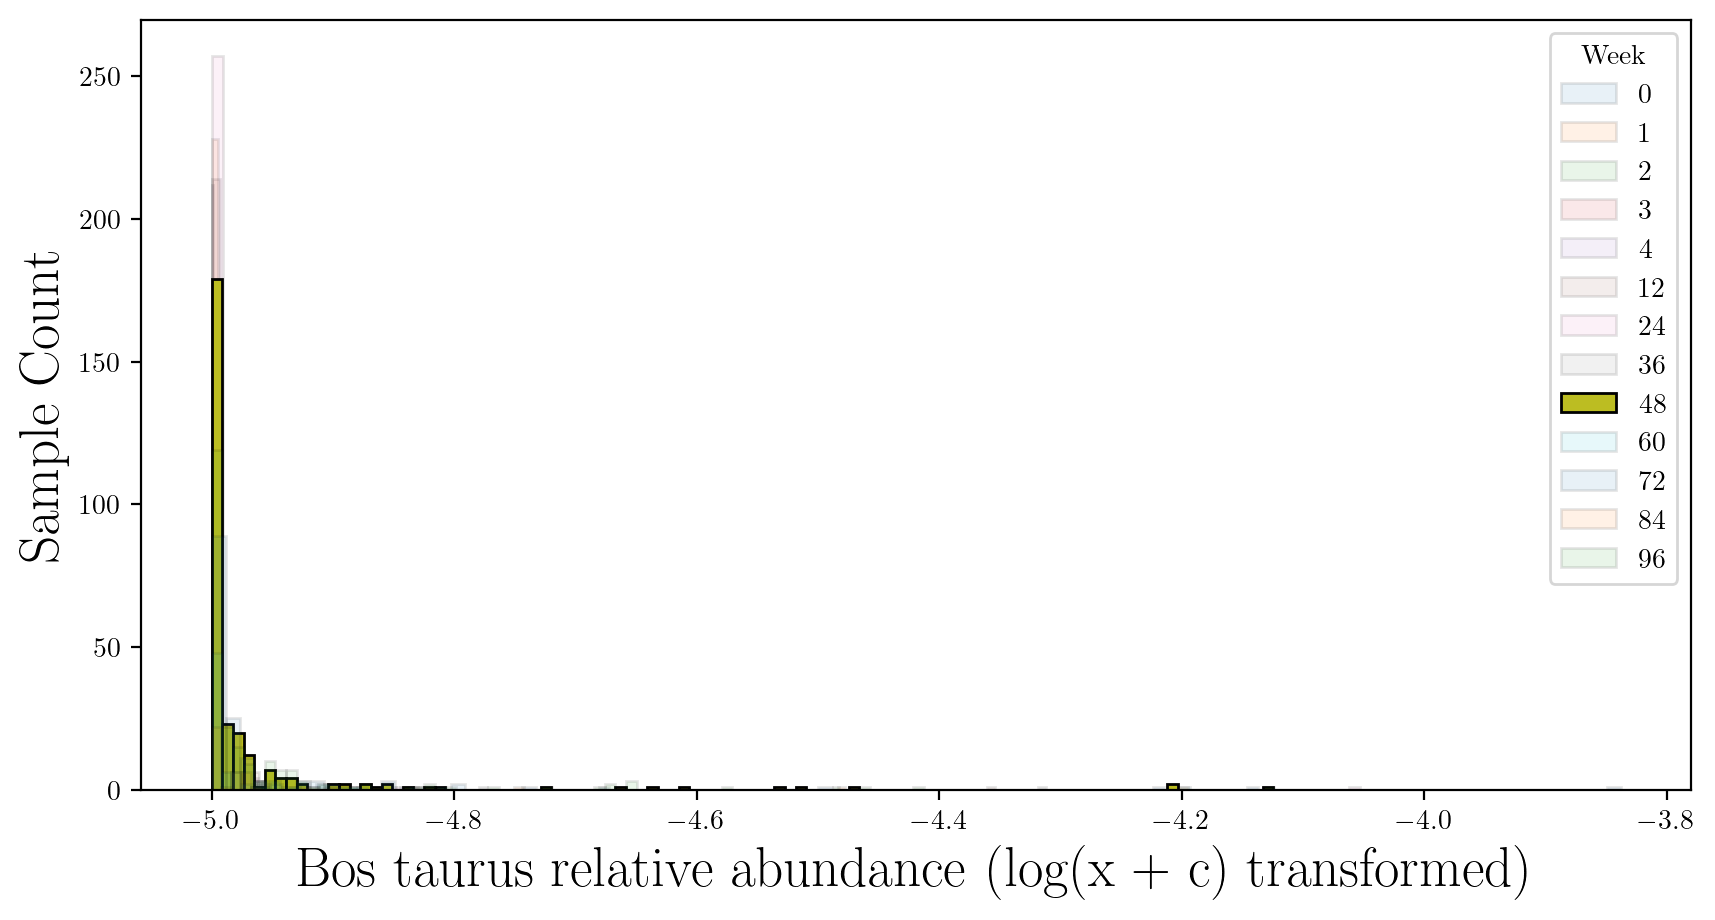

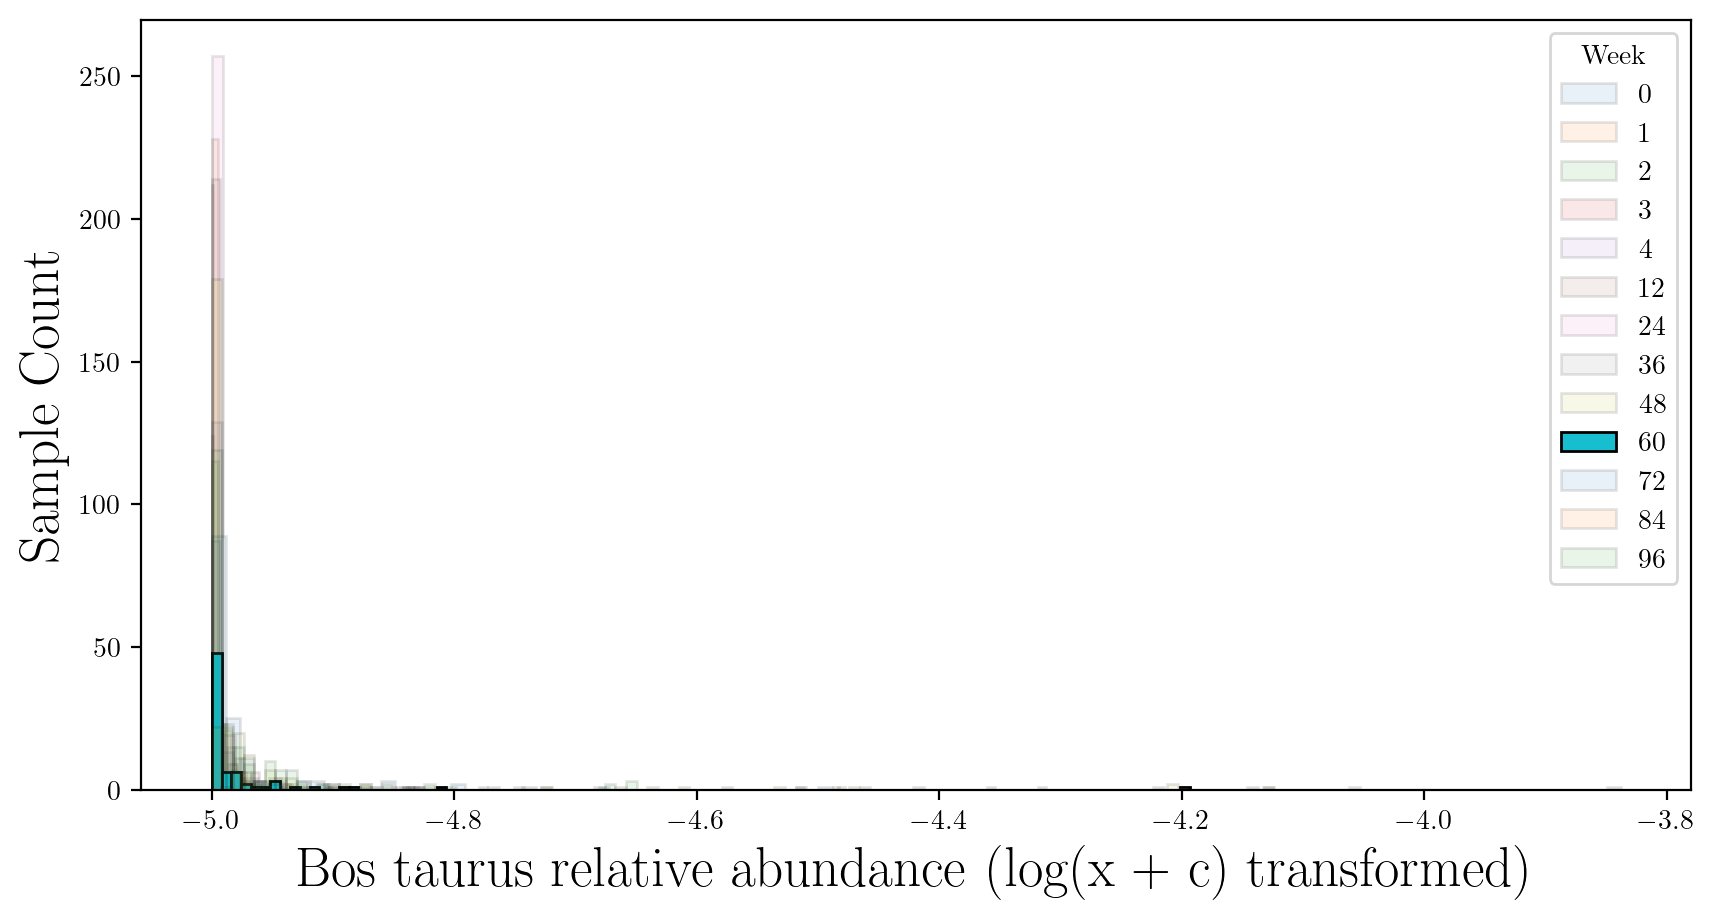

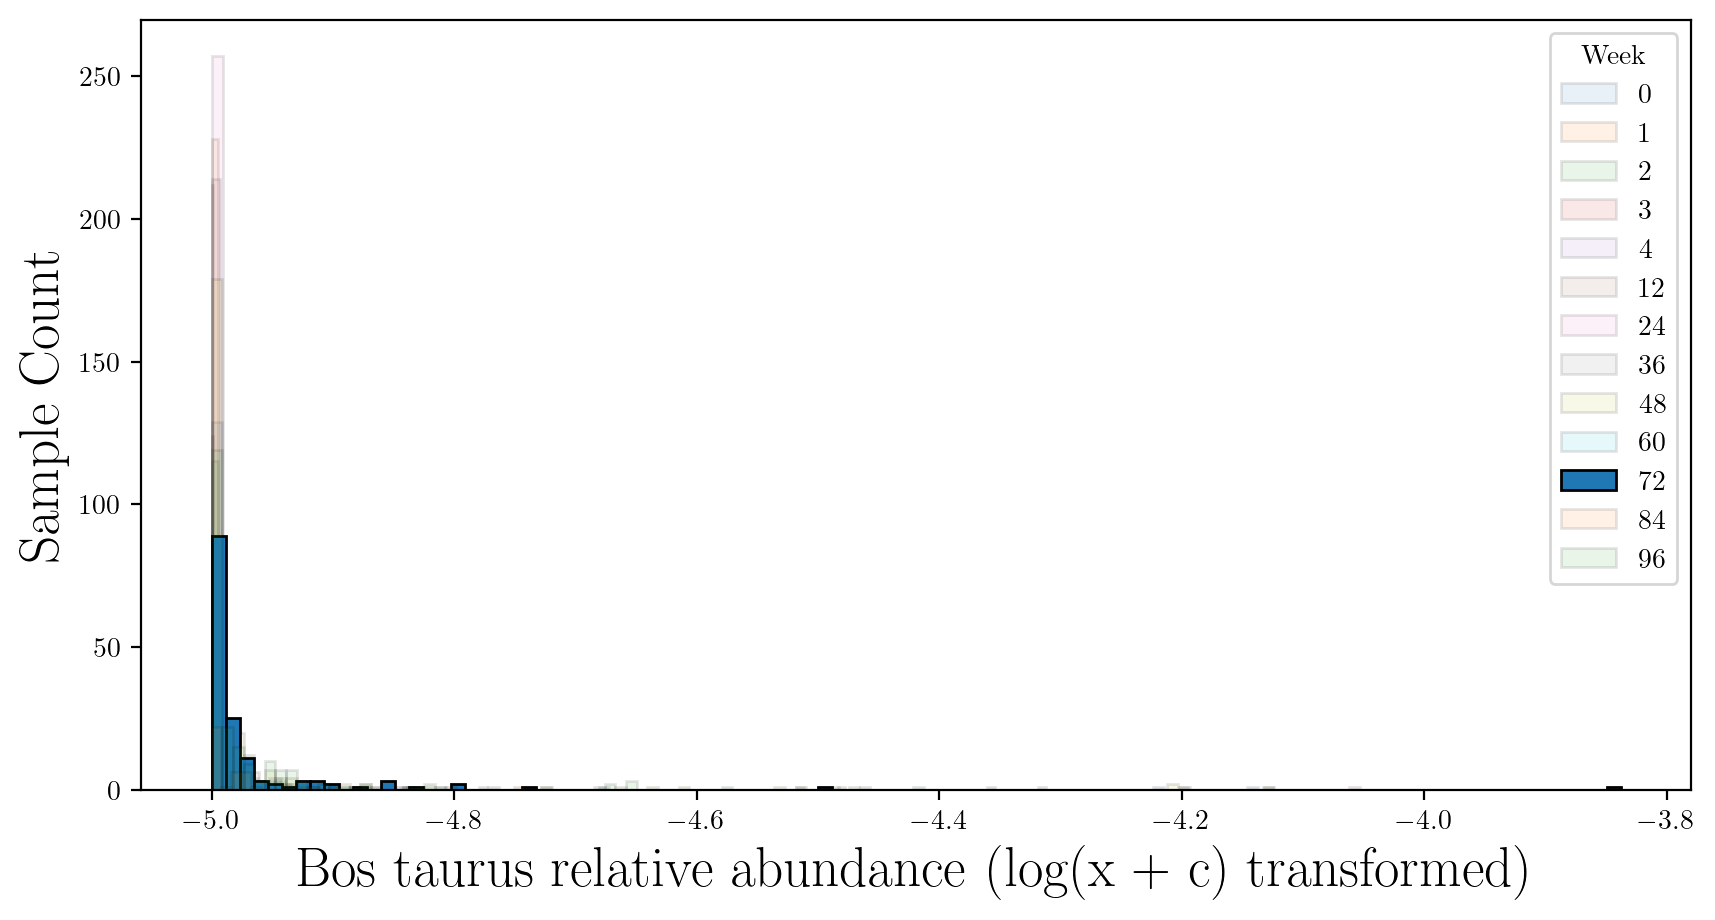

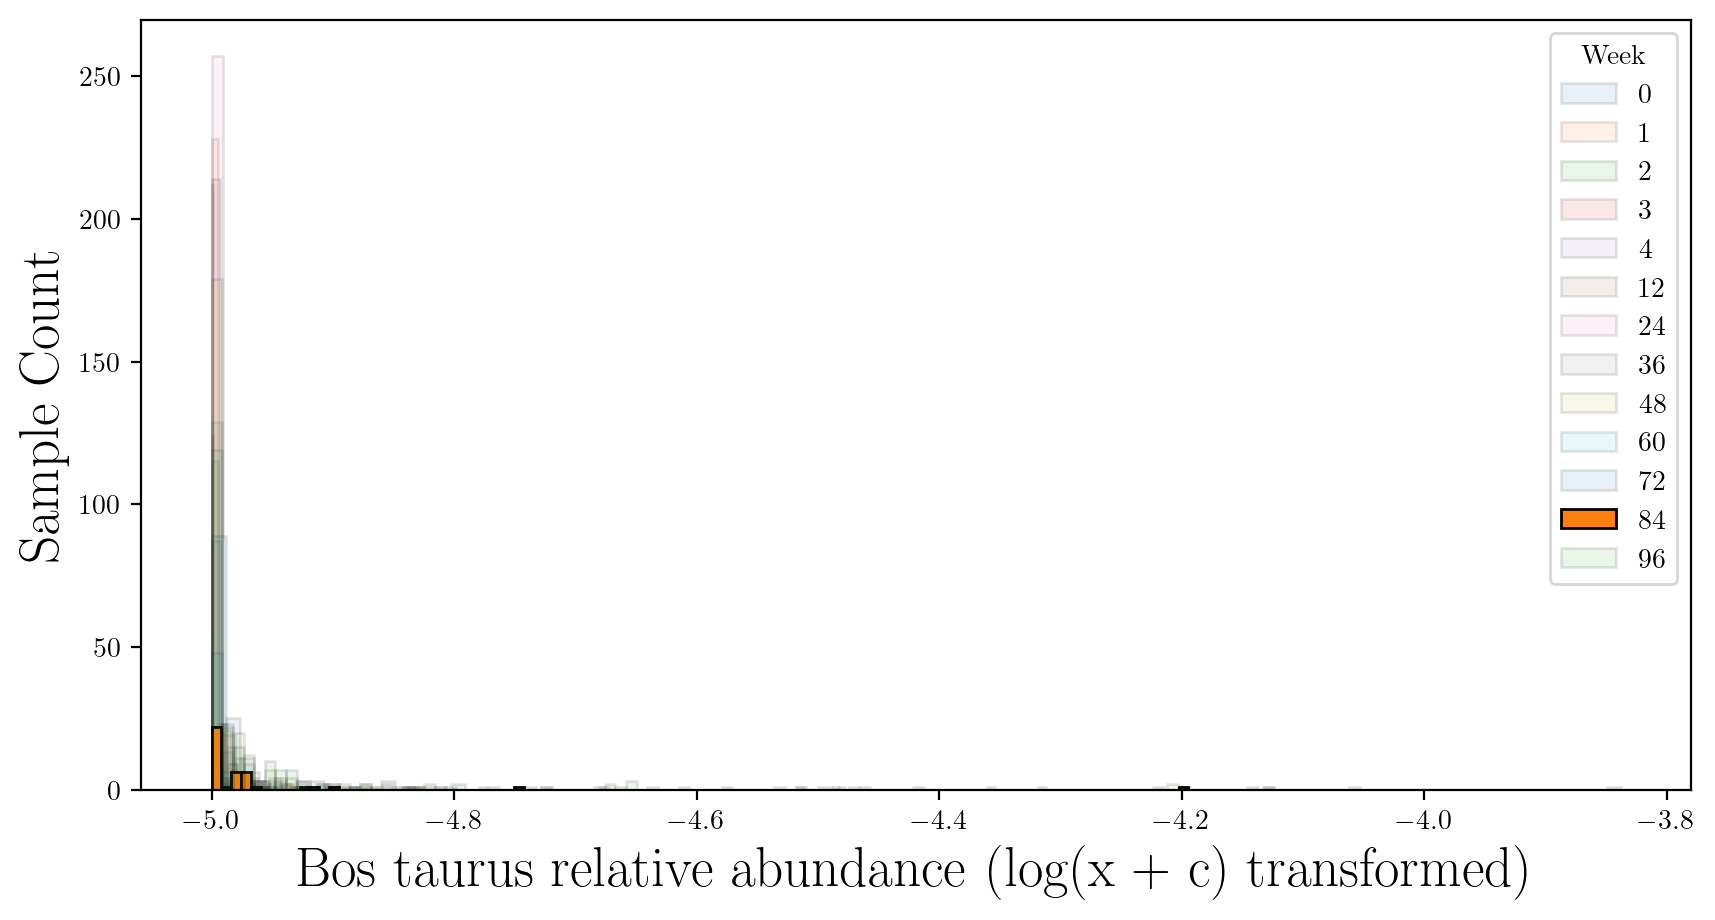

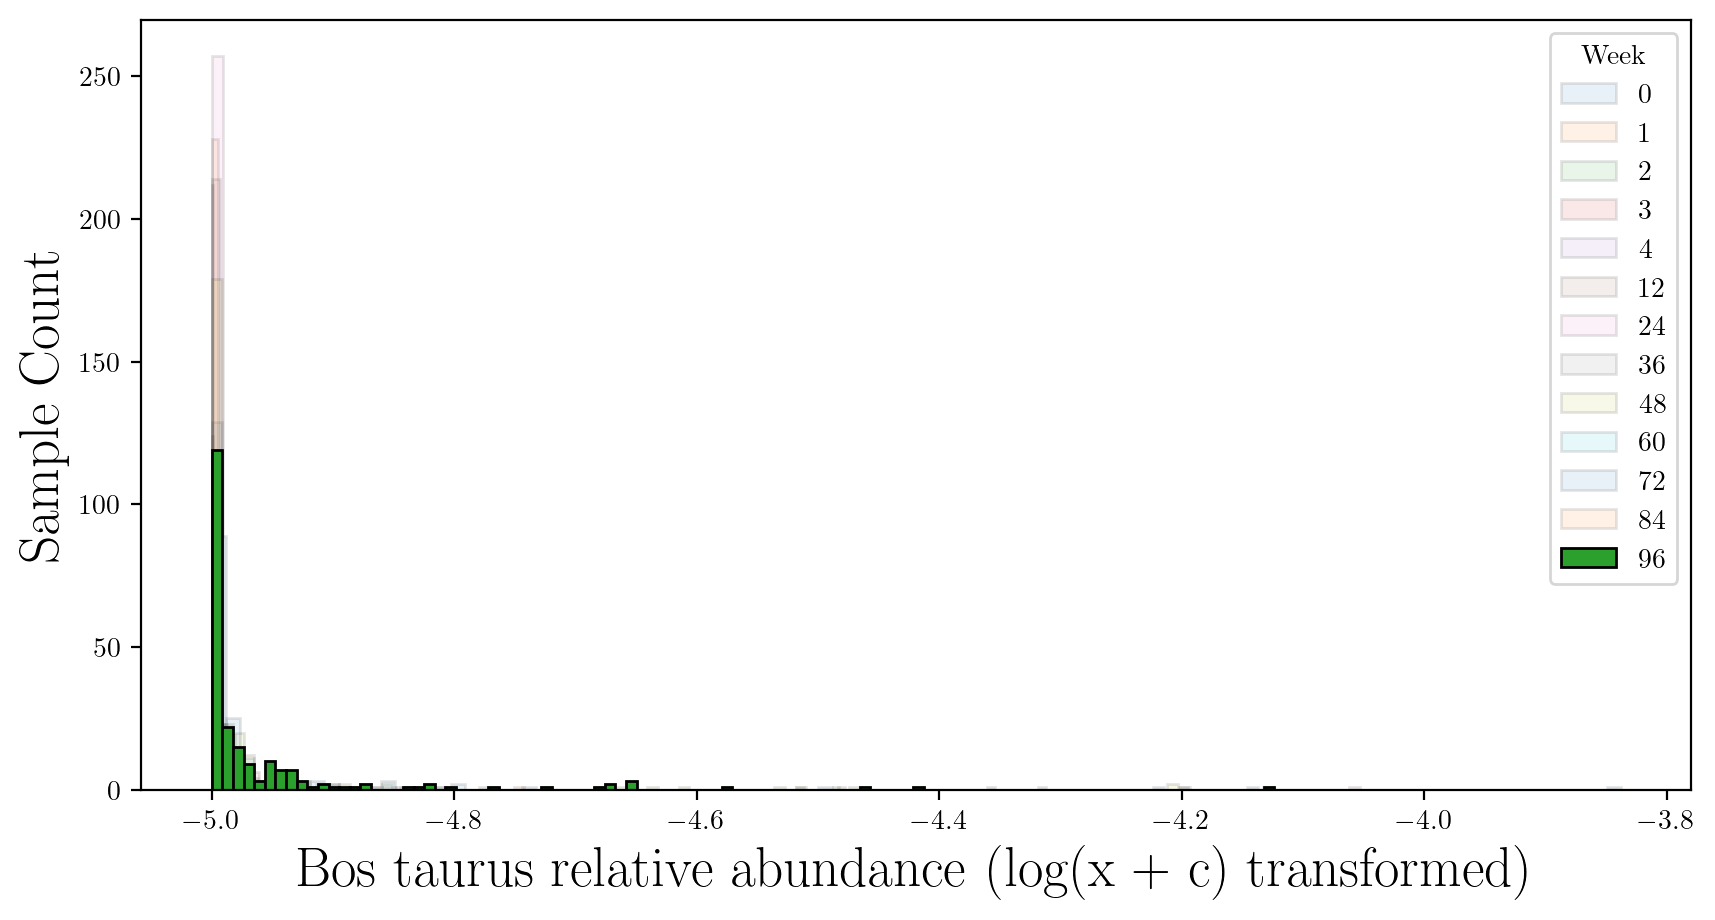

In [42]:
for bold_week in timepoints_sorted: 
    plt.figure(figsize=(10, 5), dpi=200, facecolor="white")
    for week in timepoints_sorted:
        df = metadata[metadata["Timeline_Weeks"] == week]

        alpha = 1 if week == bold_week else 0.1
        df["Bos taurus relative abundance (log trans)"].plot.hist(bins=100, label=week, alpha=alpha, edgecolor="black")

        plt.ylabel("Sample Count", fontsize=20)
        plt.xlabel("Bos taurus relative abundance (log(x + c) transformed)", fontsize=20)

    plt.legend(title="Week")
    plt.savefig(os.path.join(config.FIGURE_DIR, f"bos_taurus_week_{bold_week}.png"))
    plt.show()

In [35]:
def plot_index(index):
    fig = plt.figure(figsize=(16, 4), dpi=200)
    ax = plt.gca()

    plotted_longitudinal = []

    subjects = np.unique(metadata.index)
    for subject in subjects:
        df = metadata.loc[[subject]].copy()
        df = df.sort_values("timepoint_plot")
        df = df.drop_duplicates("Timeline_Weeks")
        plotted_longitudinal.append(df)
        ax.plot(df["timepoint_plot"], df[index], c="gray", zorder=0, alpha=0.2)
    ax.set_xticks([int(t) for t in timepoints_sorted])
    ax.set_xticklabels(timepoints_sorted)
    ax.set_ylabel(index, fontsize=18)
    ax.set_xlabel("Time point (weeks)", fontsize=18)

    plotted_df = pd.concat(plotted_longitudinal)

    for i, time in enumerate(timepoints_sorted):
        data = plotted_df[plotted_df["timepoint"] == time][index]
        sc = ax.scatter(np.ones(data.shape[0]) * int(time), data, s=2 if i < 5 else 10)
        c = sc.get_facecolors()[0].tolist()
        width = 2.0 if i < 5 else 2
        widths = 0.75 if i < 5 else 3
        bp = ax.boxplot(data, positions=[int(time)], patch_artist=True, widths=[widths],
            boxprops=dict(facecolor=[0, 0, 0, 0], color=c, linewidth=width),
            capprops=dict(color=c, linewidth=0),
            whiskerprops=dict(color=c, linewidth=width),
            flierprops=dict(color=c, markeredgecolor=c, linewidth=width),
            medianprops=dict(color=c, linewidth=width))

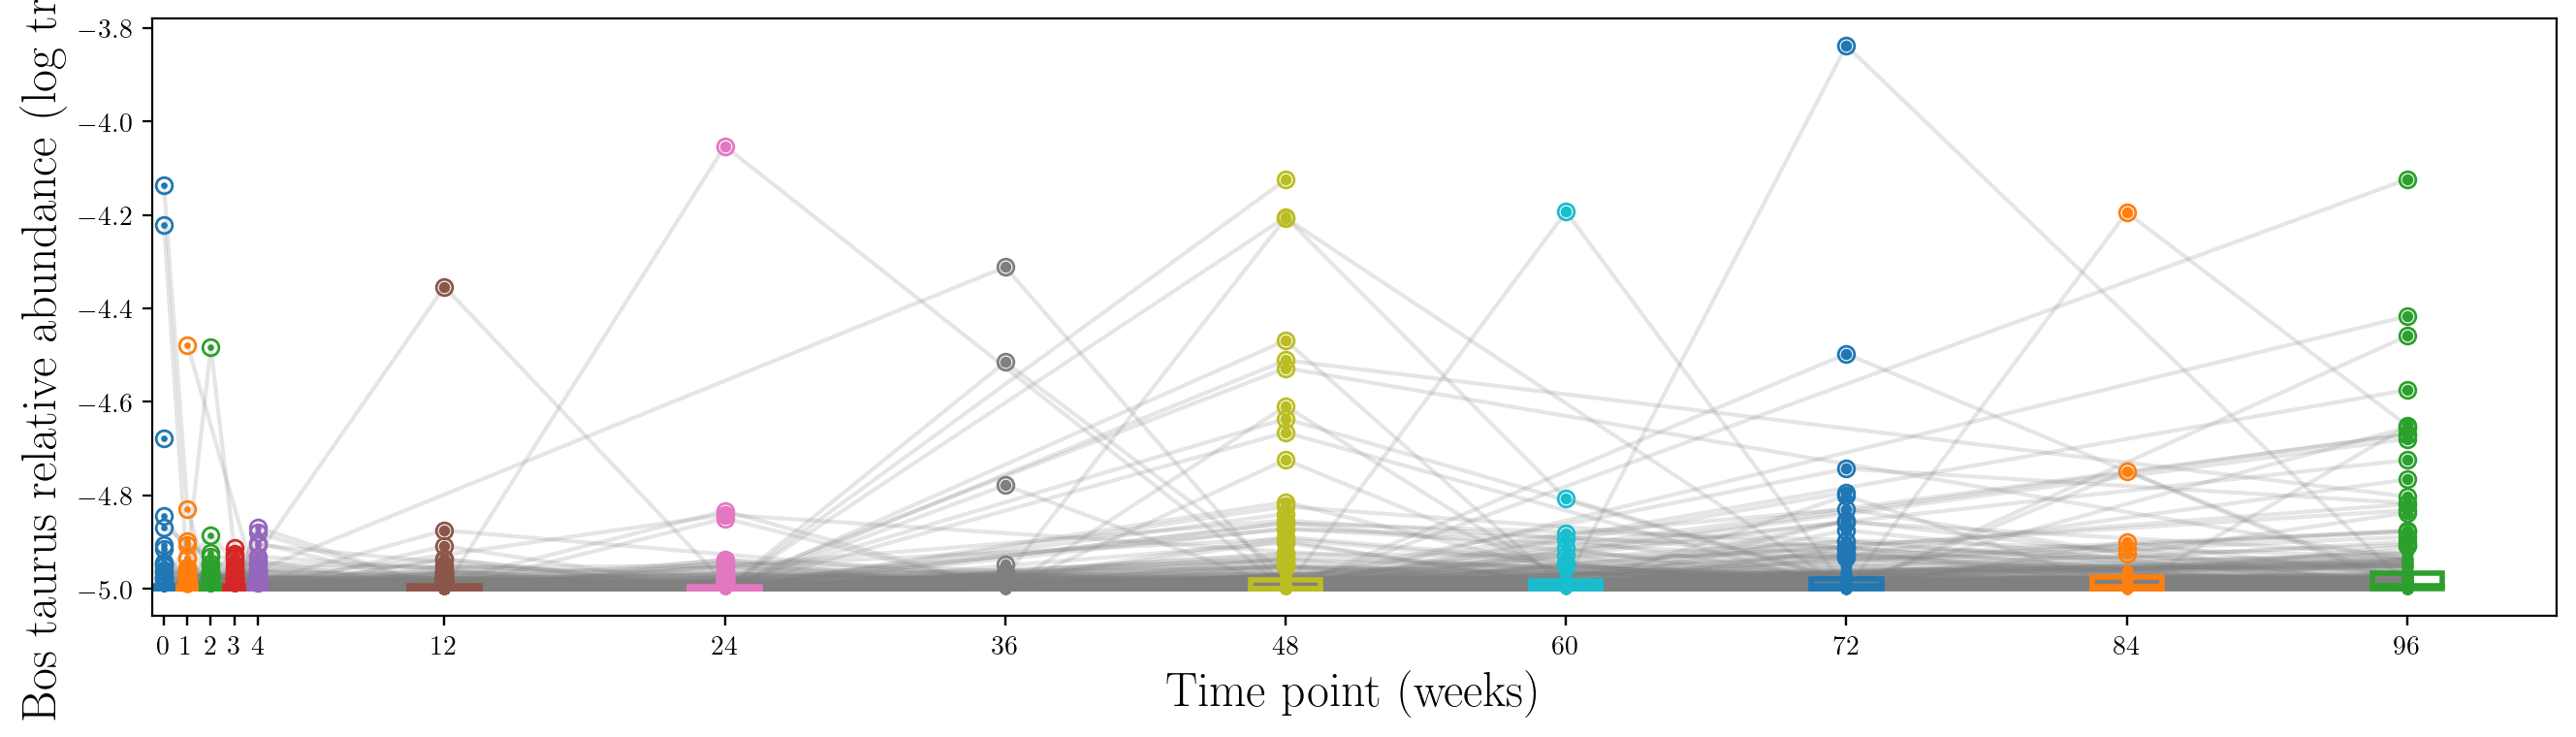

In [41]:
plot_index("Bos taurus relative abundance (log trans)")